#### Query
```
SELECT *
FROM mean_param
WHERE sigma IN (3, 4) -- Selecting PCEBs (sigma=3 or sigma=4)
AND type = 'WD/M';

```

In [1]:
import csv
import lightkurve as lk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np
import astropy.units as u

In [2]:
palette = sns.color_palette()

In [3]:
# Define the sine wave function
def sine_wave(t, amplitude, frequency, phase, offset):
    t_float = t.value.astype(float)
    return amplitude * np.sin(2 * np.pi * frequency * t_float + phase) + offset

In [4]:
# Make query seperated by commas instead of spaces
with open('sdss_query.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')

    with open('final_sdds_query.csv', 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        
        # Iterate through each row
        for row in reader:
            # Replace spaces for commas for each element
            modified_row = [column.replace(' ', ',') for column in row]
            
            writer.writerow(modified_row)

## SDSSJ013851.54-001621.6
*row 1*

In [5]:
star1_result = lk.search_lightcurve('SDSSJ013851.54-001621.6', mission='TESS')
star1_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 70,2023,SPOC,120,241444875,0.0
1,TESS Sector 03,2018,TESS-SPOC,1800,241444875,0.0
2,TESS Sector 30,2020,TESS-SPOC,600,241444875,0.0
3,TESS Sector 42,2021,TESS-SPOC,600,241444875,0.0
4,TESS Sector 43,2021,TESS-SPOC,600,241444875,0.0
5,TESS Sector 30,2020,QLP,600,241444875,0.0
6,TESS Sector 42,2021,QLP,600,241444875,0.0
7,TESS Sector 43,2021,QLP,600,241444875,0.0
8,TESS Sector 70,2023,QLP,200,241444875,0.0


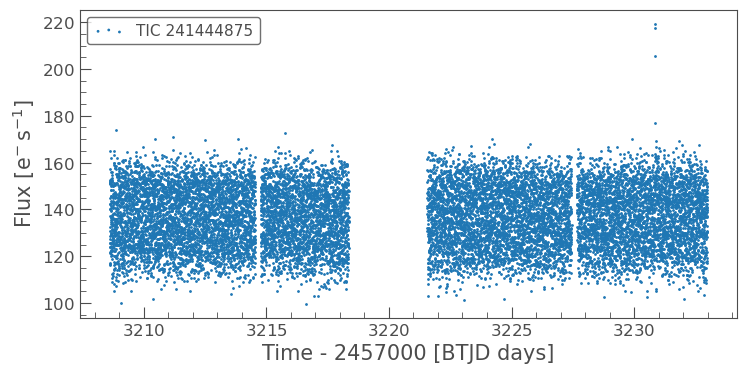

In [47]:
star1_lc = star1_result[0].download().remove_nans()
star1_lc.scatter(color=palette[0])
plt.show()

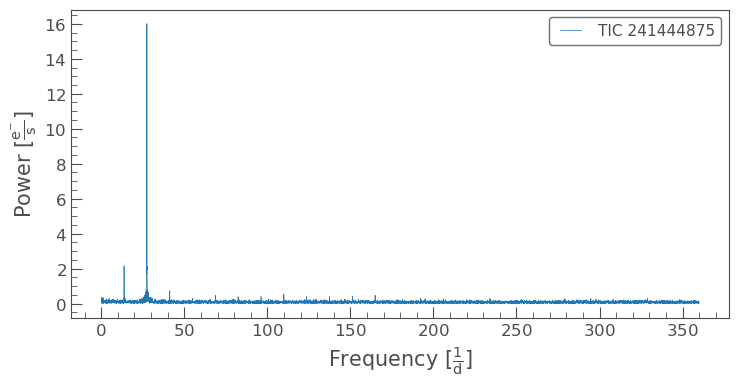

In [7]:
star1_pg = star1_lc.to_periodogram(oversample_factor=1)
star1_pg.plot(color = palette[0]);
plt.show()

In [8]:
star1_pg.period

<Quantity [2.43768828e+01, 1.21884414e+01, 8.12562760e+00, ...,
           2.77862565e-03, 2.77830896e-03, 2.77799234e-03] d>

In [9]:
star1_pg.power

<Quantity [0.12835341, 0.18347597, 0.35771251, ..., 0.05450274, 0.02391801,
           0.0450629 ] electron / s>

In [10]:
star1_pg.period_at_max_power

<Quantity 0.03638341 d>

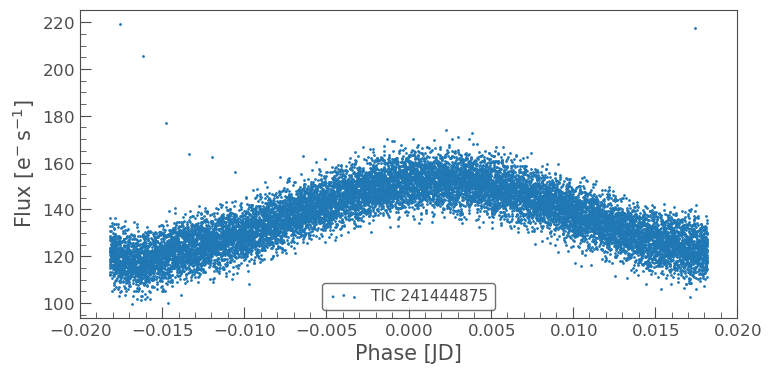

In [11]:
period_fold_lc = star1_lc.fold(period=star1_pg.period_at_max_power).scatter(color = palette[0]);
plt.show()

In [12]:
star1_pg.period_at_max_power

<Quantity 0.03638341 d>

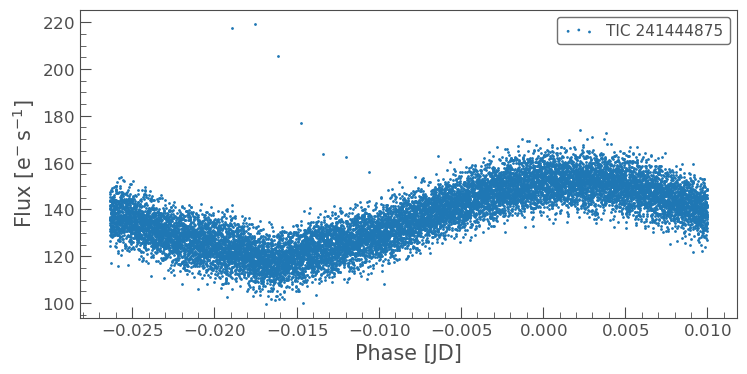

In [13]:
star1_lc.fold(period=star1_pg.period_at_max_power, wrap_phase=0.01).scatter(color = palette[0]);
plt.show()

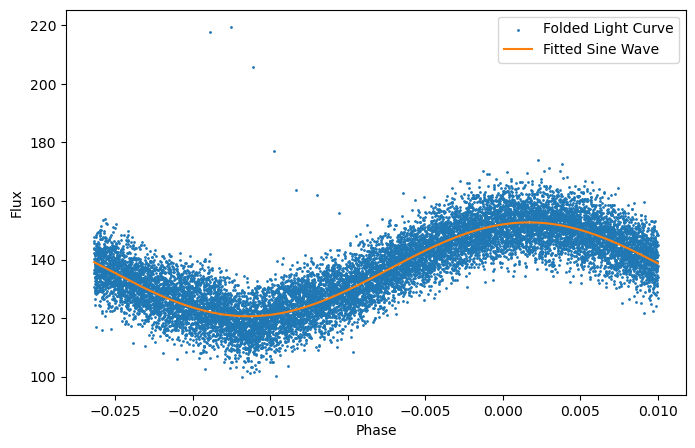

In [14]:
folded_lc = star1_lc.fold(period=star1_pg.period_at_max_power, wrap_phase=0.01)

initial_guess = (24, 1, 0, 0) # amplitude, frequency, phase, offset
popt, pcov = curve_fit(sine_wave, folded_lc.time, folded_lc.flux, p0=initial_guess)

fitted_curve = sine_wave(folded_lc.time, *popt)
time_values = folded_lc.time.value.astype(float)

plt.figure(figsize=(8,5))
plt.scatter(time_values, folded_lc.flux, color=palette[0], label='Folded Light Curve', s=1)
plt.plot(time_values, fitted_curve, color=palette[1], label='Fitted Sine Wave')
plt.xlabel('Phase')
plt.ylabel('Flux')
plt.legend()
plt.show()

In [15]:
"""
    FOLD SIN WITH OG DATA!
"""

'\n    FOLD SIN WITH OG DATA!\n'

## SDSSJ084841.17+232051.7
*row 5*

In [16]:
star2_result = lk.search_lightcurve('SDSSJ084841.17+232051.7', mission='TESS')
star2_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 72,2023,SPOC,120,332023767,0.0


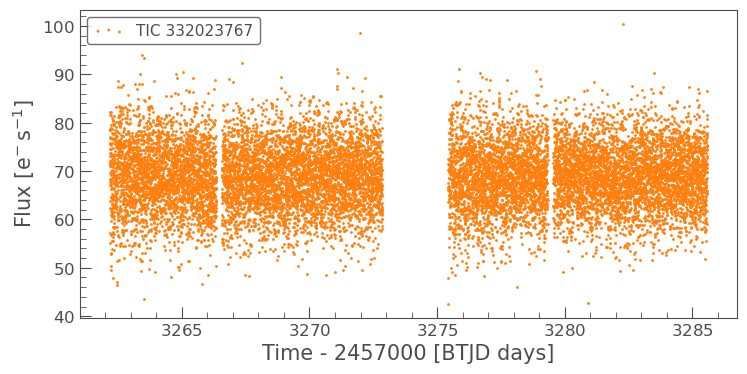

In [48]:
star2_lc = star2_result.download()
star2_lc.scatter(color = palette[1])
plt.show()

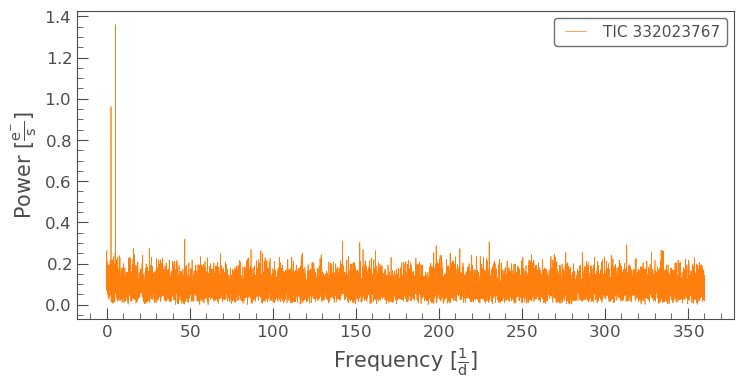

In [49]:
star2_pg = star2_lc.to_periodogram(oversample_factor=1)
star2_pg.plot(color = palette[1]);
plt.show()

## SDSSJ121010.13+334722.9
*row 5*

In [19]:
star3_result = lk.search_lightcurve('SDSSJ121010.13+334722.9', mission='TESS')
star3_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 22,2020,TESS-SPOC,1800,359032079,0.0
1,TESS Sector 49,2022,TESS-SPOC,600,359032079,0.0
2,TESS Sector 49,2022,QLP,600,359032079,0.0


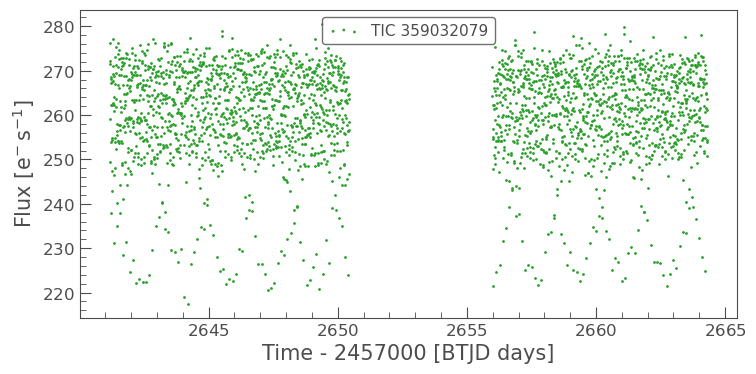

In [46]:
star3_lc = star3_result[1].download().remove_nans()
star3_lc.scatter(color = palette[2])
plt.show()

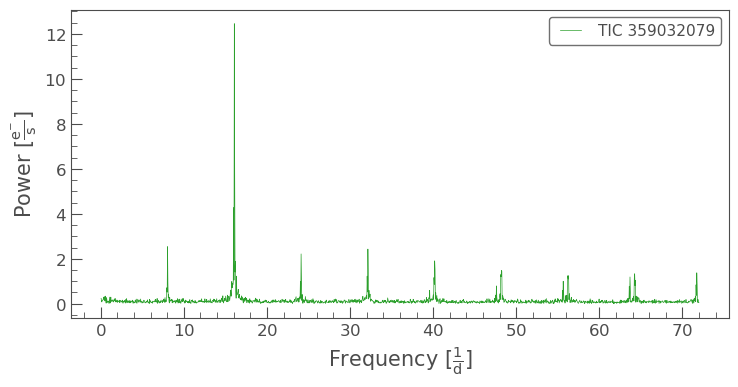

In [41]:
star3_pg = star3_lc.to_periodogram(oversample_factor=1)
star3_pg.plot(color = palette[2]);
plt.show()

In [42]:
print(f"Period: {star3_pg.period}")
print()
print(f"Power: {star3_pg.power}")
print()
print(f"Period at max power: {star3_pg.period_at_max_power}")

Period: [2.31456601e+01 1.15728300e+01 7.71522003e+00 ... 1.39096515e-02
 1.39012974e-02 1.38929532e-02] d

Power: [0.23909905 0.14185851 0.07820534 ... 0.16112015 0.04667475 0.06008348] electron / s

Period at max power: 0.062219516389769094 d


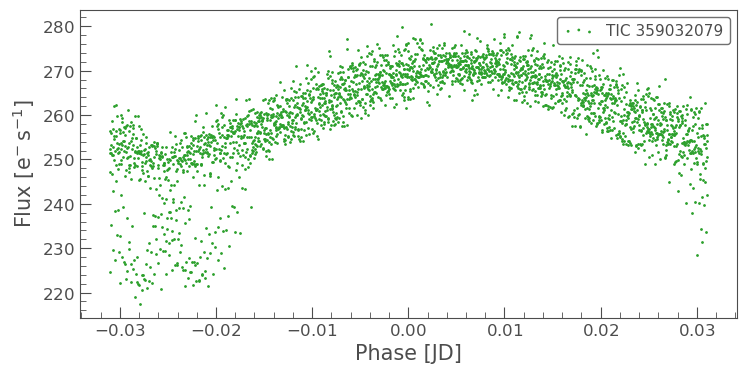

In [43]:
period_fold_lc = star3_lc.fold(period=star3_pg.period_at_max_power).scatter(color = palette[2]);
plt.show()

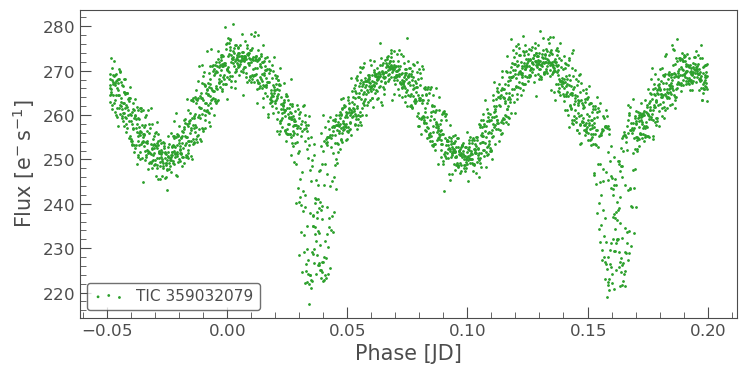

In [44]:
star3_lc.fold(period=4*star3_pg.period_at_max_power, wrap_phase=0.2).scatter(color = palette[2]);
plt.show()